In [1]:
# day 7 - analyzing open data of data professionals (real world practice)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter, defaultdict

In [2]:
prof_table = pd.read_excel('2018_Data_Professionals_Salary.xlsx')
print(prof_table.head(10))

  SalaryUSD         Country       PrimaryDatabase  YearsWithThisDatabase  \
0    200000   United States  Microsoft SQL Server                     10   
1     61515  United Kingdom  Microsoft SQL Server                     15   
2     95000         Germany  Microsoft SQL Server                      5   
3     56000  United Kingdom  Microsoft SQL Server                      6   
4     35000          France  Microsoft SQL Server                     10   
5    215000  United Kingdom  Microsoft SQL Server                     15   
6     75000         Germany  Microsoft SQL Server                     16   
7     47000     Netherlands  Microsoft SQL Server                      4   
8     41000  United Kingdom  Microsoft SQL Server                      3   
9     51652  United Kingdom  Microsoft SQL Server                      8   

                                      OtherDatabases  \
0                                      MySQL/MariaDB   
1                                 Oracle, PostgreSQ

In [3]:
# Let's see what the most popular primary databases are
primary_count = defaultdict(int)
for row in prof_table['PrimaryDatabase']:
    primary_count[row] += 1
print(primary_count.items())

# sort the dictionary by values - key takes a function
primary_count = sorted(primary_count.items(), key=lambda item:item[1])
print(primary_count)

dict_items([('Microsoft SQL Server', 5643), ('Azure SQL DB', 19), ('MongoDB', 6), ('PostgreSQL', 34), ('Oracle', 194), ('Other', 30), ('SAP', 9), ('Microsoft Access', 12), ('DB2', 15), ('MySQL/MariaDB', 23), ('Teradata', 10), ('Amazon RDS (any flavor)', 8), ('Elasticsearch', 2), ('Cassandra', 2), ('SQLite', 4)])
[('Elasticsearch', 2), ('Cassandra', 2), ('SQLite', 4), ('MongoDB', 6), ('Amazon RDS (any flavor)', 8), ('SAP', 9), ('Teradata', 10), ('Microsoft Access', 12), ('DB2', 15), ('Azure SQL DB', 19), ('MySQL/MariaDB', 23), ('Other', 30), ('PostgreSQL', 34), ('Oracle', 194), ('Microsoft SQL Server', 5643)]


['Elasticsearch', 'Cassandra', 'SQLite', 'MongoDB', 'Amazon RDS (any flavor)', 'SAP', 'Teradata', 'Microsoft Access', 'DB2', 'Azure SQL DB', 'MySQL/MariaDB', 'Other', 'PostgreSQL', 'Oracle', 'Microsoft SQL Server']
[2, 2, 4, 6, 8, 9, 10, 12, 15, 19, 23, 30, 34, 194, 5643]


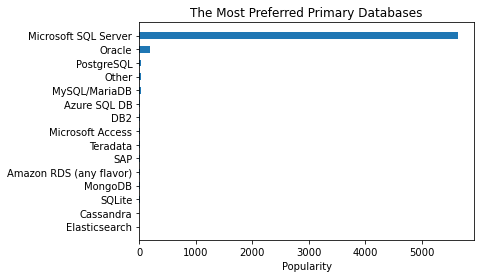

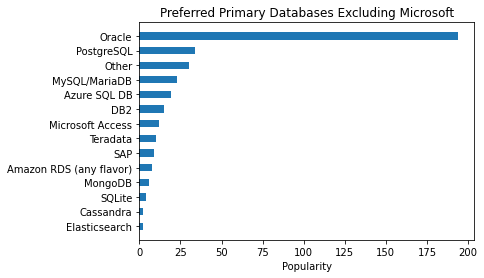

In [4]:
primary_list = []
popularity_list = []
for item in primary_count:
    primary_list.append(item[0])
    popularity_list.append(item[1])
print(primary_list)
print(popularity_list)

plt.barh(primary_list, popularity_list, 0.5)
plt.xlabel('Popularity')
plt.title('The Most Preferred Primary Databases')
plt.tight_layout
plt.show()
plt.savefig('temporary.png')

# creating another graph without MS SQL Server stats
primary_list.remove('Microsoft SQL Server')
popularity_list.remove(5643)

plt.barh(primary_list, popularity_list, 0.5)
plt.xlabel('Popularity')
plt.title('Preferred Primary Databases Excluding Microsoft')
plt.tight_layout
plt.show()
# Microsoft SQL Server is by far the most used primary database for companies across the world
# Oracle seems to be more popular than all other options

In [5]:
# NaN value seems to be causing an error, so replace nontype with string 'NaN'
prof_table['OtherDatabases'] = prof_table['OtherDatabases'].fillna("NaN")

In [6]:
secondary_count = Counter()
for row in prof_table['OtherDatabases']:
    secondary_count.update(row.split(','))
secondary_count = secondary_count.most_common(20)
print(secondary_count)

[('Microsoft SQL Server', 2061), (' Microsoft Access', 1323), ('NaN', 1232), ('Oracle', 1026), (' MySQL/MariaDB', 948), (' Azure SQL DB', 924), (' PostgreSQL', 659), ('MySQL/MariaDB', 625), (' Oracle', 586), (' Amazon RDS (any flavor)', 458), (' DB2', 387), (' MongoDB', 381), (' SQLite', 360), ('Microsoft Access', 331), ('Azure SQL DB', 201), (' Elasticsearch', 195), ('PostgreSQL', 172), (' SAP', 169), (' Redis', 162), (' Teradata', 107)]


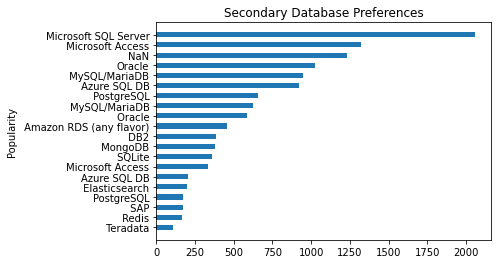

In [7]:
secondary_list = []
secondary_popularity_list = []
for item in secondary_count:
    secondary_list.append(item[0])
    secondary_popularity_list.append(item[1])
secondary_popularity_list.reverse()
secondary_list.reverse()
plt.barh(secondary_list, secondary_popularity_list, 0.5)
plt.ylabel('Popularity')
plt.title('Secondary Database Preferences')
plt.show()
# Once again, MS SQL Server is the most preferred database by far, but other optionss are more well distributed
# It's probably because MS SQL Server is already the most preferred primary database for companies

In [8]:
# Analyzing the most wanted data professionals in the U.S.
temp = prof_table[['SalaryUSD', 'Country', 'JobTitle', 'YearsWithThisDatabase']]
US_table = temp.loc[temp['Country'] == 'United States']
print(US_table)

     SalaryUSD        Country  \
0       200000  United States   
12      137500  United States   
14       85000  United States   
15       96000  United States   
17       66000  United States   
...        ...            ...   
6004    136000  United States   
6005    110000  United States   
6006     85000  United States   
6007    160000  United States   
6009    119000  United States   

                                               JobTitle  YearsWithThisDatabase  
0                                                   DBA                     10  
12                                                  DBA                     16  
14                                                  DBA                      8  
15                                                  DBA                      5  
17                    Developer: App code (C#, JS, etc)                     10  
...                                                 ...                    ...  
6004                                

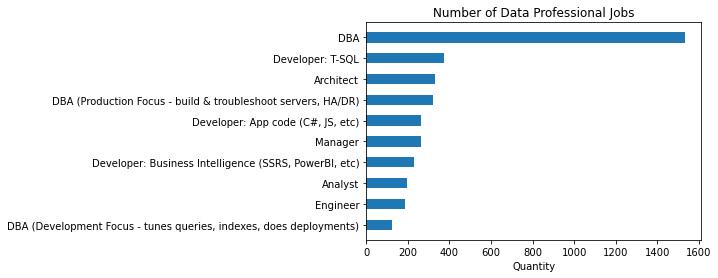

In [9]:
US_table_copy = US_table.loc[US_table['JobTitle'] == ('DBA (General - splits time evenly between writing & '
                                                    'tuning queries AND building & troubleshooting servers)')]
# merging DBA (General - ...) with DBA
for ind in US_table_copy.index:
    US_table.at[ind, 'JobTitle'] = 'DBA'
job_counter = Counter(US_table['JobTitle']).most_common(10)

# creating x & y lists
job_list = []
job_num = []
for item in job_counter:
    job_list.append(item[0])
    job_num.append(item[1])
job_list.reverse()
job_num.reverse()
# graph the lists
plt.barh(job_list, job_num, 0.5)
plt.title('Number of Data Professional Jobs')
plt.xlabel('Quantity')
plt.show()

# Database Anaylst is the most wanted job in the data related field
# It's noticeable that at least a half of top 10 in the list branch out from DBA

In [10]:
# I want to know the trend of DBAs' salaries by experience in the U.S.
US_DBA = US_table.loc[US_table['JobTitle'] == 'DBA']
print(US_DBA)

     SalaryUSD        Country JobTitle  YearsWithThisDatabase
0       200000  United States      DBA                     10
12      137500  United States      DBA                     16
14       85000  United States      DBA                      8
15       96000  United States      DBA                      5
18      101750  United States      DBA                     13
...        ...            ...      ...                    ...
5982     87400  United States      DBA                      5
5990    100000  United States      DBA                     20
5994    138000  United States      DBA                     11
5997    103000  United States      DBA                     10
5998     93500  United States      DBA                     25

[1533 rows x 4 columns]


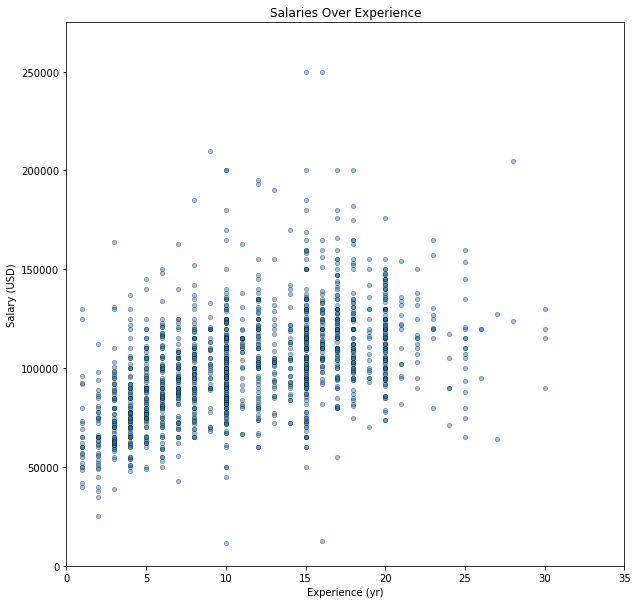

In [17]:
US_DBA = US_table.loc[US_table['JobTitle'] == 'DBA']
US_DBA_salary = US_DBA['SalaryUSD']
experience = US_DBA['YearsWithThisDatabase']

temp_df = pd.DataFrame({'salary':US_DBA_salary, 'experience':experience})

plt.scatter(experience, US_DBA_salary, linewidths=0.5, s=20, edgecolors='black', alpha=0.45)
plt.ylim(0, 275000) #sets y range
plt.xlim(0, 35) # sets x range
plt.xlabel('Experience (yr)')
plt.ylabel('Salary (USD)')
plt.title('Salaries Over Experience')
plt.show()
plt.rcParams['figure.figsize'] = [10, 10]
# there is an apparent positive correlation between salary and experience, 
# which makes sense: people with more experience get paid more

In [12]:
# day 8 - average, mean graphs
'''
let's divide experience into four paritions to calculate median and average
salaries of DBAs in the U.S.
I'm going to use: 
entry level: 0~3, intermediate level:4~8
advanced level: 8~15, expert level: 15 < x 
'''
# generating average/median stats
entry_level = US_DBA[US_DBA['YearsWithThisDatabase'] < 4]
entry_level_median = entry_level['SalaryUSD'].median()
entry_level_mean = int(entry_level['SalaryUSD'].mean().round())
print(entry_level_median)
print(entry_level_mean)
int_level = US_DBA[(3 < US_DBA['YearsWithThisDatabase']) & \
                   (US_DBA['YearsWithThisDatabase'] < 9)]
int_level_median = int_level['SalaryUSD'].median()
int_level_mean = int(int_level['SalaryUSD'].mean().round())
print(int_level_median)
print(int_level_mean)
advanced_level = US_DBA[(8 < US_DBA['YearsWithThisDatabase']) & \
                   (US_DBA['YearsWithThisDatabase'] < 16)]
advanced_level_median = advanced_level['SalaryUSD'].median()
advanced_level_mean = int(advanced_level['SalaryUSD'].mean().round())
print(advanced_level_median)
print(advanced_level_mean)
expert_level = US_DBA[15 < US_DBA['YearsWithThisDatabase']]
expert_level_median = expert_level['SalaryUSD'].median()
expert_level_mean = int(expert_level['SalaryUSD'].mean().round())

69500.0
72722
90000.0
90417
105000.0
108078


                          Average Salary  Median Salary
entry level (< 4)                  72722        69500.0
intermediate level (4~8)           90417        90000.0
advanced level (9~15)             108078       105000.0
expert level (< 15)               122057       116000.0


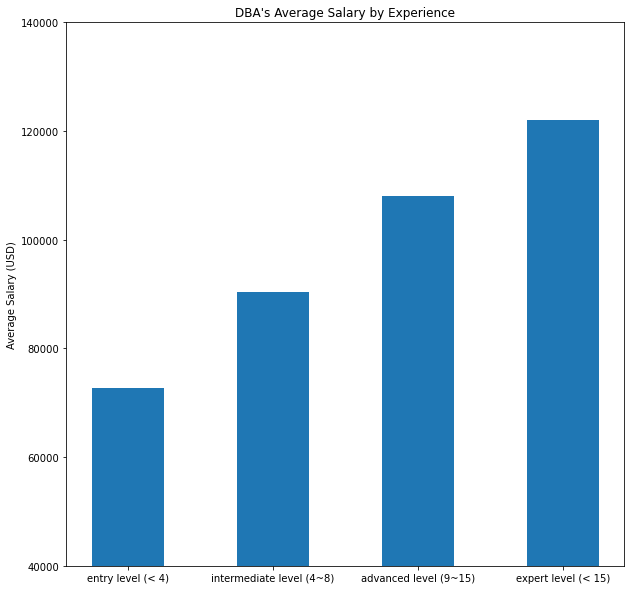

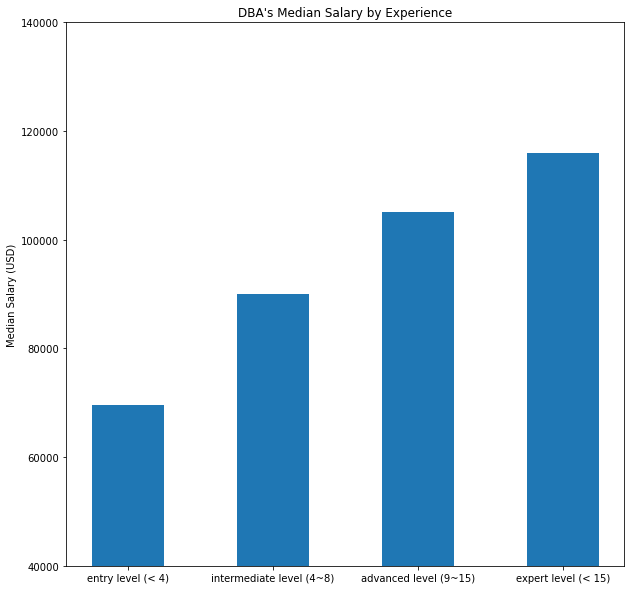

In [13]:
mean_list = [entry_level_mean, int_level_mean, advanced_level_mean, expert_level_mean]
median_list = [entry_level_median, int_level_median, advanced_level_median, expert_level_median]
experience_list = ['entry level (< 4)', 'intermediate level (4~8)',\
                  'advanced level (9~15)', 'expert level (< 15)']
frame = {'Average Salary':mean_list, 'Median Salary':median_list}
salary_df = pd.DataFrame(frame, index=experience_list)
print(salary_df)

plt.ylim(40000, 140000)
plt.title("DBA's Average Salary by Experience")
plt.ylabel("Average Salary (USD)")
plt.bar(experience_list, mean_list, 0.5)
plt.show()

plt.ylim(40000, 140000)
plt.title("DBA's Median Salary by Experience")
plt.ylabel("Median Salary (USD)")
plt.bar(experience_list, median_list, 0.5)
plt.show()

In [14]:
# As seen on the scatter (plot) graph, these two graphs confirm the trend:
# more experience results in higher payrolls. 
# Both medians and averages were used to display the trend since
# averaging could be skewed by extreme stats.

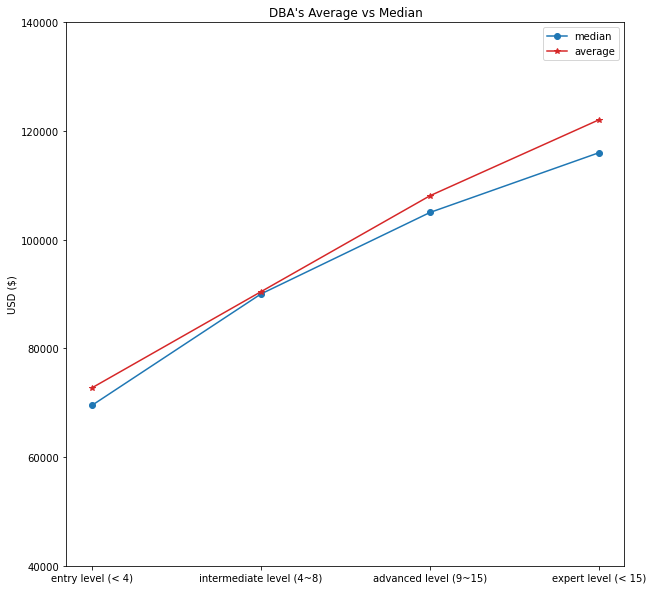

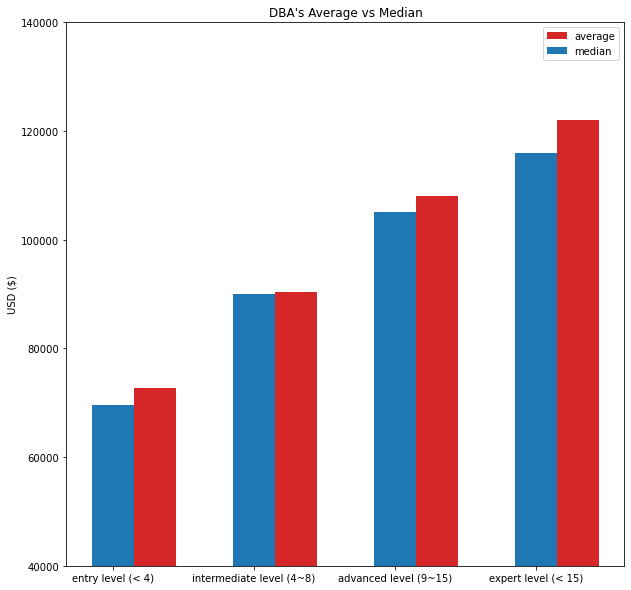

In [15]:
plt.ylim(40000, 140000)
plt.title("DBA's Average vs Median")
plt.ylabel('USD ($)')
plt.plot(experience_list, median_list, c='tab:blue', marker='o', label='median')
plt.plot(experience_list, mean_list, c='tab:red', marker='*', label='average')
plt.legend()
plt.show()

# how to put bar-charts side by side
# set up length of x-list as indexes, and use width to place bars side by side
# xticks(ticks=, labels) 
# get or set the current tick locations and labels of the x-axis.
plt.ylim(40000, 140000)
x_indexes = np.arange(len(experience_list))
width = 0.3
plt.title("DBA's Average vs Median")
plt.ylabel('USD ($)')
plt.bar(x_indexes+width, mean_list, width=width, color='tab:red', label='average')
plt.bar(x_indexes, median_list, width=width, color='tab:blue', label='median')
plt.xticks(ticks=x_indexes, labels=experience_list)
plt.legend()
plt.show()

In [16]:
# Average/Median Salaries of DBAs in the U.S

# In all sections, average salaries are slightly higher than median salaries.
# What's noticeable from the table/graphs is average salaries are within the margin of error of ±6% of median salaries. 
# Therefore, they are both pointing toward congruous estimations, meaning the results are reasonably reliable.
# Thus we can give rough approximations of DBA's earning in the U.S.
    # entry level (0~3 years):$70000
    # intermediate level (4~8 years): $90000
    # advanced level (9~15 years): $105000
    # expert level (<15 years): $120000